# CP322 ASSIGNMENT 1 
## Riley Huston | ID: 190954880
---

## Section 1.1 | Know Your Data: 5 points

In [1]:
import pandas as pd

df = pd.read_csv (r'loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
df[["credit.policy"]].describe()

,credit.policy
count,9577.000000
mean,0.805054
std,0.396180
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<AxesSubplot:ylabel='Frequency'>

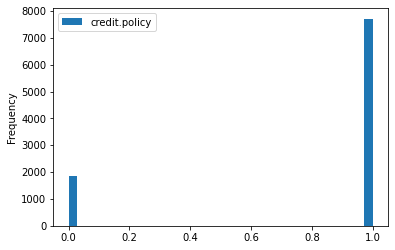

In [4]:
df[["credit.policy"]].plot.hist(bins = 35)

credit.policy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: installment, dtype: object

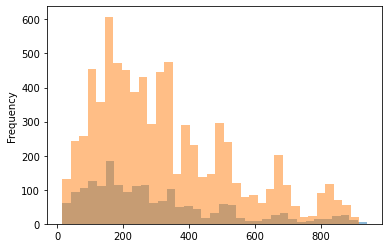

In [5]:
installment = df[["installment", "credit.policy"]].groupby("credit.policy")
installment["installment"].plot.hist(bins = 35, alpha = 0.5)

<AxesSubplot:title={'center':'fico'}, xlabel='[credit.policy]'>

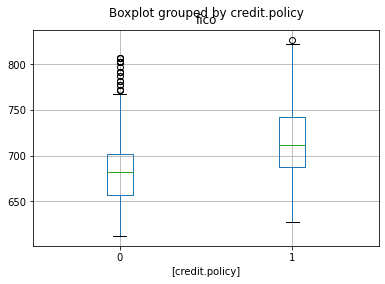

In [6]:
df[["credit.policy", "fico"]].boxplot(by = "credit.policy")

---
## Section 1.2 | Data Preprocessing and Model Construction: 6 points


#### 1.2.1 | Data Preprocessing and Splitting

In [7]:
dummies = pd.get_dummies(df[["purpose"]])

In [8]:
new_pf = pd.concat([df.drop("purpose", axis = 1),dummies], axis = 1)
new_pf

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Features = new_pf.columns[1:]
Features = new_pf.drop("not.fully.paid", axis = 1).columns
X = new_pf[Features]
y = new_pf["not.fully.paid"]

X_Training, X_Testing, y_Training, y_Testing = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#### 1.2.2 | Training a Decision Tree

In [11]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy

In [12]:
DT_entropy = tree.DecisionTreeClassifier(criterion = "entropy")
DT_gini = tree.DecisionTreeClassifier(criterion = "gini")

DT_entropy = DT_entropy.fit(X_Training, y_Training)
DT_gini = DT_gini.fit(X_Training, y_Training)

av_entropy = numpy.average(cross_val_score(DT_entropy,X_Training,y_Training,cv=10))
av_gini = numpy.average(cross_val_score(DT_gini,X_Training,y_Training,cv=10))

print( "ENTROPY:", av_entropy, "\nGINI:   ",  av_gini)
print("Gini has a greater average cross validation score" if (av_gini > av_entropy) else "Entropy has a greater average cross validation score")

ENTROPY: 0.7344529216807171 
GINI:    0.7395237671552817
Gini has a greater average cross validation score


#### 1.2.3 | Training a Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RF_entropy = RandomForestClassifier(n_estimators = 15, criterion = "entropy", bootstrap = True, max_samples = 1000)
RF_gini = RandomForestClassifier(n_estimators = 15, criterion = "gini", bootstrap = True, max_samples = 1000)

RF_entropy = RF_entropy.fit(X_Training, y_Training)
RF_gini = RF_gini.fit(X_Training, y_Training)

av_entropy = numpy.average(cross_val_score(RF_entropy,X_Training,y_Training,cv=10))
av_gini = numpy.average(cross_val_score(RF_gini,X_Training,y_Training,cv=10))

print( "ENTROPY:", av_entropy, "\nGINI:   ",  av_gini)
print("Gini has a greater average cross validation score" if (av_gini > av_entropy) else "Entropy has a greater average cross validation score")


ENTROPY: 0.8306739773561403 
GINI:    0.8308210067397737
Gini has a greater average cross validation score


## 1.3 | Performance Evaluation and Analysis: 4 points

In [15]:
from sklearn.metrics import precision_recall_fscore_support

In [16]:
y_pred_DT_entropy = DT_entropy.predict(X_Testing)
y_pred_DT_gini = DT_gini.predict(X_Testing)

y_pred_RF_entropy = RF_entropy.predict(X_Testing)
y_pred_RF_gini = RF_gini.predict(X_Testing)

prec = []
rec = []
fsc = []

print("{:>40} {:>17} {:>21}".format("Precision", "Recall", "F-Score"))

precision, recall, fscore, _ = precision_recall_fscore_support(y_Testing, y_pred_DT_entropy, average='binary', pos_label=0)
prec.append(precision)
rec.append(recall)
fsc.append(fscore)
print("{:1} | {:>24} | {:0<19}, {:0<19}, {:0<19}".format("0","Descision Tree Entropy:",precision, recall, fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_Testing, y_pred_DT_gini, average='binary', pos_label=0)
prec.append(precision)
rec.append(recall)
fsc.append(fscore)
print("{:1} | {:>24} | {:0<19}, {:0<19}, {:0<19}".format("1","Descision Tree Gini:",precision, recall, fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_Testing, y_pred_RF_entropy, average='binary', pos_label=0)
prec.append(precision)
rec.append(recall)
fsc.append(fscore)
print("{:1} | {:>24} | {:0<19}, {:0<19}, {:0<19}".format("2","Random Forest Entropy:",precision, recall, fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_Testing, y_pred_RF_gini, average='binary', pos_label=0)
prec.append(precision)
rec.append(recall)
fsc.append(fscore)
print("{:1} | {:>24} | {:0<19}, {:0<19}, {:0<19}".format("3","Random Forest Gini:",precision, recall, fscore))

max_value = max(prec)
max_prec = prec.index(max_value)
max_value = max(rec)
max_rec = rec.index(max_value)
max_value = max(fsc)
max_fsc = fsc.index(max_value)
print("{:>28} | {:<20} {:<20} {:<20}".format("MAX INDEX:",max_prec, max_rec, max_fsc))

min_value = min(prec)
min_prec = prec.index(min_value)
min_value = min(rec)
min_rec = rec.index(min_value)
min_value = min(fsc)
min_fsc = fsc.index(min_value)
print("{:>28} | {:<20} {:<20} {:<20}".format("MIN INDEX:",min_prec, min_rec, min_fsc))


                               Precision            Recall               F-Score
0 |  Descision Tree Entropy: | 0.86464901218999580, 0.84476386036960980, 0.85459077690070630
1 |     Descision Tree Gini: | 0.85191489361702130, 0.82217659137577000, 0.83678160919540230
2 |   Random Forest Entropy: | 0.85157633722989720, 0.98726899383983570, 0.91441612780524910
3 |      Random Forest Gini: | 0.85028449502133710, 0.98193018480492810, 0.91137793024585480
                  MAX INDEX: | 0                    2                    2                   
                  MIN INDEX: | 3                    1                    1                   


### Conclusion

With the evaluation metrics calculated we can now decide which of the classifiers are the best for the our prediction.

In this scenario we will want to use the classifier that has the least amount of risk as we do not want to give a large loan to someone unqualified and potentially lose a lot of money. Thus we should select the classifier with large recall value. The recall metric gives the ratio of true positives to false negatives, meaning that with the higher the ratio percentage, the less chance the model will give a loan to someone unqualified (false positive). Since the recall is far better in the cases of the Random Forest, we should select one of those two. Selecting the model with the highest precision percentage out of the Random Forests will give us the best model for this scenario.